In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=fb084731f5a63c92e75fc981315c00b708da82d5334133235f920a7c9604aeb2
  Stored in directory: c:\users\pbeata\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [4]:
# new for sklearn
from sklearn.linear_model import LinearRegression

In [5]:
# load the data
data = pd.read_csv('../data/simple_linear_regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [6]:
x = data['SAT']  # input or feature
y = data['GPA']  # output or target

In [8]:
x.shape

(84,)

In [9]:
y.shape

(84,)

In [14]:
xmat = x.values.reshape(-1, 1)  # 2D object: must be reshaped into a 2D matrix
# because the algorithm expects multiple inputs
xmat.shape

(84, 1)

In [15]:
# regression
reg = LinearRegression()

In [16]:
reg.fit(xmat, y)  # (inputs, target)

LinearRegression()

In [17]:
# R-squared
reg.score(xmat, y)

0.40600391479679765

In [18]:
# coefficients
reg.coef_

array([0.00165569])

In [19]:
# intercept
reg.intercept_

0.2750402996602803

In [21]:
# making predictions
# reg.predict(1740)

new_data = pd.DataFrame(data=[1740, 1760], columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [22]:
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [23]:
new_data['Predicted GPA'] = reg.predict(new_data)

In [24]:
new_data

,SAT,Predicted GPA
0,1740,3.155938
1,1760,3.189051


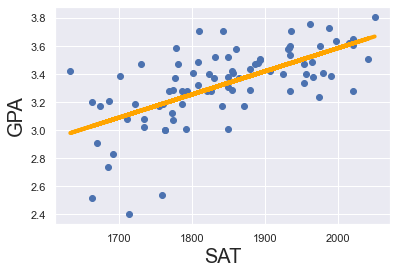

In [26]:
# plot the results

plt.scatter(x,y)
yhat = reg.coef_*xmat + reg.intercept_
#yhat = 0.0017*x + 0.275

fig = plt.plot(x, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)

plt.show()

In [28]:
# multiple linear regression
data = pd.read_csv('../data/multiple_linear_regression.csv')
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [29]:
x = data[['SAT', 'Rand 1,2,3']]
y = data['GPA']

In [30]:
# regression
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [31]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [32]:
reg.intercept_

0.29603261264909486

### Calculating the R-squared value (goodness of fit)

We can use the score function for both single and multiple linear regression.

In [34]:
# this is regular R-squared value
reg.score(x,y)

0.40668119528142843

### Formula for Adjusted R-squared

$R^2_{adj} = 1 - (1 - R^2) * \frac{n-1}{n-p-1}$

* n = 84 which is the number of observations (sample size)
* p = 2 is the number of predictors (SAT and RAND)

In [35]:
x.shape

(84, 2)

In [37]:
n = x.shape[0]
p = x.shape[1]
(n,p)

(84, 2)

In [77]:
def compute_R2_adj(R2, x):
    n = x.shape[0]
    p = x.shape[1]
    factor = (n - 1) / (n - p - 1)
    R2_adj = 1 - (1 - R2) * factor
    return R2_adj

In [39]:
R2 = reg.score(x,y)
compute_R2_adj(R2, x)

0.39203134825134023

### Feature Selection with F-Regression

How to detect the variables which are not needed in a model?

Feature selection simplifies models, improves speed, and prevents a series of unwanted issues.

If a variable had a p-value > 0.05, we can disregard it.

In [40]:
from sklearn.feature_selection import f_regression

In [41]:
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [42]:
p_values = f_regression(x,y)[1]

In [43]:
p_values

array([7.19951844e-11, 6.76291372e-01])

In [45]:
p_values.round(3)
#     SAT      RAND123

array([0.   , 0.676])

In [46]:
# therefore, SAT is useful and RAND123 is useless

### Creating a Summary Table

In [48]:
reg_summary = pd.DataFrame(data=['SAT', 'Rand 1,2,3'], columns=['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [49]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


### Standardization

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
scaler.fit(x)

StandardScaler()

In [54]:
x_scaled = scaler.transform(x)  # transform the unscaled input

In [55]:
x_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

### Regression with Scaled Features

In [56]:
reg = LinearRegression()
reg.fit(x_scaled, y)

LinearRegression()

In [57]:
reg.coef_

array([ 0.17181389, -0.00703007])

In [58]:
reg.intercept_

3.330238095238095

In [64]:
reg_summary = pd.DataFrame([['Bias'], ['SAT'], ['Rand 1,2,3']], columns=['Features'])

In [65]:
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]

In [66]:
reg_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


In [ ]:
# we can see that Rand 123 barely contributes to the model at all.

### Making Predictions

In [67]:
new_data = pd.DataFrame(data=[[1700,2], [1800,1]], columns=['SAT', 'Rand 1,2,3'])

In [68]:
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [69]:
reg.predict(new_data)

array([295.39979563, 312.58821497])

In [70]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [71]:
reg.predict(new_data_scaled)

array([3.09051403, 3.26413803])

### What if we remove the Rand 1,2,3 feature?

In [72]:
reg_simple = LinearRegression()

In [74]:
x_simple = x_scaled[:,0].reshape(-1,1)

In [75]:
reg_simple.fit(x_simple, y)

LinearRegression()

In [76]:
reg_simple.predict(new_data_scaled[:,0].reshape(-1,1))

array([3.08970998, 3.25527879])